In [4]:
from sentence_transformers import SentenceTransformer, util
import numpy as np
import csv
import time
from os.path import isfile
import pandas as pd
import re
import spacy

model = SentenceTransformer('all-mpnet-base-v2')

In [5]:
import matplotlib.pyplot as plt
embeddings_path = "./archive/encodings.npy"

# Create sentance embeddings
def create_embeddings(model : SentenceTransformer, text : list[str]):
    # Create and save the encodings to the specified file
    return np.array(model.encode(text, normalize_embeddings=True))


def plot(tensor):
  x = np.arange(len(tensor))
  y = tensor
  plt.plot(x,y)
  plt.xlabel('Sample Number')
  plt.ylabel('Similarity')
  plt.title('Similarity scores')
  plt.show()

def find_similarity(model, embeddings, text):
  question_embedding = model.encode(text)
  print(len(question_embedding))
  print(len(embeddings))
  return util.dot_score(embeddings, question_embedding)

def generate_all_text_emeddings(model, text: list[str]):
   return [model.encode(val) for val in text]


nlp = spacy.load('en_core_web_sm')
def split_sentances(text: str):
  #text = text.replace('\n', '').replace('?', '').replace('.', '')

  # Split the string into sentences using regular expression
  return [sent.text for sent in nlp(text).sents]



In [6]:
def prepare_dataframe(df: pd.DataFrame):
    df["Split_Text"] = df["ABSTRACT"].apply(lambda x: split_sentances(x))


df_test = pd.read_csv("./archive/test_tm/test_processed.csv")
df_train = pd.read_csv("./archive/train_tm/train_processed.csv")
df_news = pd.read_json("./archive/news/news.json", lines=True)

vals = np.array([])
#prepare_dataframe(df_train)
#prepare_dataframe(df_test)

df_news.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [7]:
import requests
from bs4 import BeautifulSoup
df_train.to_csv("./archive/train_tm/train_processed.csv")
df_test.to_csv("./archive/test_tm/test_processed.csv")

text = BeautifulSoup(requests.get(df_news["link"][0]).text).text
print(text)


# encoding = create_embeddings(model, text)[0]
# len(encoding)
# # print(encoding)
# for val in text:
#     print(val)

Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters | HuffPost Latest News





Skip to Main Content×Main MenuU.S. EditionNewsU.S. NewsWorld NewsBusinessEnvironmentHealthCoronavirusSocial JusticePoliticsJoe BidenCongressExtremismElections 2022OpinionEntertainmentCulture & ArtsMediaCelebrityTV & FilmLifeStyle & BeautyFood & DrinkParentingTravelWellnessRelationshipsMoneyHome & LivingWork/LifeShoppingVoicesQueer VoicesWomen's VoicesBlack VoicesLatino VoicesAsian VoicesSpecial ProjectsHighlineHuffPost PersonalVideoHoroscopesFrom Our PartnersA Minute And ChangeNewslettersInternationalAustraliaBrazilCanadaEspañaFranceΕλλάδα (Greece)IndiaItalia日本 (Japan)한국 (Korea)QuébecU.K.U.S.Follow UsTerms | Privacy PolicyPart of HuffPost News. ©2023 BuzzFeed, Inc. All rights reserved.Log InJoin HuffPostNEWSPOLITICSENTERTAINMENTLIFEPERSONALVOICESSHOPPINGVIDEOU.S. EditionOpen editions submenu×What's HotMississippi News Anchor Off The Air After Dropping Snoop Dogg QuoteItalians Invite

In [8]:
results = [None] * len(text)
all_embeddings = generate_all_text_emeddings(model, text)
# for i in range(len(results)):
#     results[i] = find_similarity(model, encoding, text[i])
print(f"({len(all_embeddings)}, {len(all_embeddings[0])})")


KeyboardInterrupt: 

In [ ]:
results = np.ones((len(all_embeddings), len(all_embeddings)))
print(results.shape)
for i in range(len(all_embeddings)):
    for j in range(len(all_embeddings)):
        if i != j:
            results[i,j] = util.dot_score(all_embeddings[i], all_embeddings[j])


(15, 15)


In [ ]:
print(results)

[[ 1.          0.09664501  0.00736671  0.0621524   0.06267878 -0.03536183
   0.05112422  0.04111039  0.05707515 -0.05201023  0.04455327  0.04249474
  -0.021968    0.02431543 -0.01637523]
 [ 0.09664501  1.          0.26287282  0.54240322  0.58532262  0.50237495
   0.35420984  0.58246017  0.62647671  0.62271053  0.53887057  0.36638045
   0.18204011  0.11262812  0.26691765]
 [ 0.00736671  0.26287282  1.          0.22287051  0.29477358  0.47374824
   0.33596325  0.28361541  0.29459059  0.2978006   0.63197321  0.26993912
   0.33663845  0.21717392  0.28285125]
 [ 0.0621524   0.54240322  0.22287051  1.          0.63103306  0.40581083
   0.47589833  0.42004663  0.59790325  0.53424501  0.45804405  0.45970905
   0.37734929  0.26552713  0.32692683]
 [ 0.06267878  0.58532262  0.29477358  0.63103306  1.          0.55146843
   0.6334244   0.31956941  0.59036922  0.54806411  0.59941375  0.49860883
   0.40252823  0.23142913  0.23947354]
 [-0.03536183  0.50237495  0.47374824  0.40581083  0.55146843  1.

In [ ]:
# Initialize avg array
avg = [[None] * 2 for _ in range(len(results)) ]
# calculate all average values found in the results
for i in range(len(results)):
    temp = results[i]
    np.delete(temp, i)
    avg[i][0] = np.sum(temp) / len(temp)
    avg[i][1] = i

avg.sort(key=lambda x: x[0])

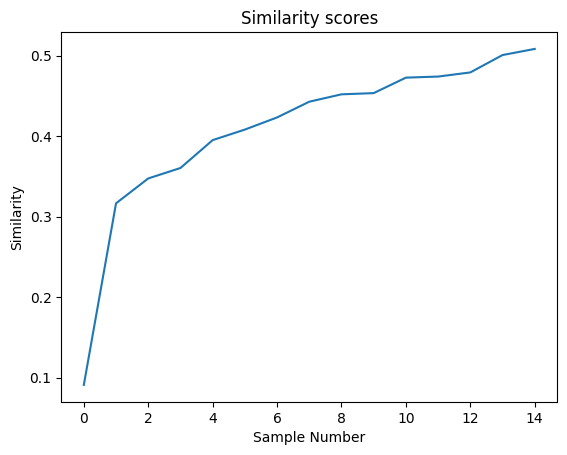

Val: 0.22563449529310067
Val: 0.030923960482080792
Val: 0.012983481337626779
Val: 0.03461290622750918
Val: 0.013118506843845024
Val: 0.015078157559037242
Val: 0.019549287855625153
Val: 0.00917378937204677
Val: 0.0015042198201020707
Val: 0.019225750366846706
Val: 0.0013378744324048508
Val: 0.005147988100846601
Val: 0.021583752085765184
Val: 0.007614944130182266
[[7, 8], [8, 9], [10, 11], [11, 12], [13, 14]]


In [ ]:
sim_vals = [[avg[i][0] for i in range(len(avg))]][0]
sim_ids =  [[avg[i][1] for i in range(len(avg))]][0]
plot([avg[i][0] for i in range(len(avg))])

threshold = 0.01
val1 = sim_vals[0]

indices = []
for i in range(1, len(sim_vals)):
    val2 = sim_vals[i]
    val = val2 - val1
    print(f"Val: {val}")
    if val <= threshold:
        indices.append([i-1, i])
    val1 = val2

print(indices)

In [ ]:
pairs = [[None] * 2 for _ in range(len(indices))]
for i in range(len(indices)):
    pairs[i][0] = sim_ids[indices[i][0]]
    pairs[i][1] = sim_ids[indices[i][1]]
print(pairs)
print(f"Text 1: {text[pairs[0][1]]}")
print(f"Text 2: {text[pairs[0][0]]}")
print(f"Text: {text[2]}")

[[1, 3], [3, 11], [10, 6], [6, 4], [9, 8]]
Text 1: The theorem asserts
a duality between the existence of high cohesiveness somewhere local and a
global overall tree structure.

Text 2: We prove a general width duality theorem for combinatorial structures with
well-defined notions of cohesion and separation.
Text: These might be graphs and
matroids, but can be much more general or quite different.


In [84]:
arr = [ model.encode("Harsh language", normalize_embeddings=True),
        model.encode("Polite language", normalize_embeddings=True),
        model.encode("Clean language", normalize_embeddings=True),
        model.encode("Biased language"),
        model.encode("Unbiased language"),
        model.encode("Right wing language", normalize_embeddings=True),
        model.encode("Left wing language", normalize_embeddings=True),
        model.encode("Political language", normalize_embeddings=True),
        model.encode("Dear friend, would you be so kind as to attend to the dishes? Your aid would be most appreciated.", normalize_embeddings=True),
        model.encode("Please don't get hurt, you're blood will stain the tablecloth, which is most unsettling", normalize_embeddings=True),
        model.encode("Fuck you I hope you get cut", normalize_embeddings=True),
        model.encode("She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots", normalize_embeddings=True),
        model.encode("He later acknowledged criticism of his remark about the pandemic being over and clarified the pandemic is “not where it was.” The initial comment didn't bother Murphy", normalize_embeddings=True) ]
        # model.encode("I call to your friendship for aid, to eat all of these cookies", normalize_embeddings=True) ]
        # model.encode("Fuck, I hope you get hurt", normalize_embeddings=True) ]

comparisons = np.zeros((len(arr), len(arr)))

for i in range(len(arr)):
    for j in range(len(arr)):
        comparisons[i,j] = util.dot_score(arr[i], arr[j])



In [76]:
print(comparisons[5])
print(comparisons[6])
print(comparisons[7])

[0.4664101  0.39160532 0.37466675 0.56852138 0.43936312 1.
 0.93427324 0.74100852 0.08366673 0.10545937 0.15702155 0.11341876
 0.16551287]
[0.42061788 0.39389789 0.4064351  0.52301168 0.44225973 0.93427324
 0.99999988 0.76113224 0.08753808 0.09679979 0.10868797 0.09962495
 0.14072146]
[0.44689959 0.46907574 0.43320283 0.51151055 0.49375144 0.74100852
 0.76113224 1.         0.09840447 0.07858481 0.07547201 0.0877756
 0.18339981]


## Checking the similarity between different embeddings with similar scores but opposite meaning

In [89]:
print(arr[5])

[-1.49760898e-02  7.35209696e-03  3.25241615e-03  3.65862623e-02
 -4.34428006e-02  2.09170338e-02 -5.02944142e-02  1.55569362e-02
 -2.23791450e-02 -5.84861152e-02 -2.89355908e-02 -2.52331365e-02
 -1.46180158e-02  7.33116269e-03  5.04074665e-03 -3.93353030e-02
  5.41448407e-02  5.20499609e-02  4.00909074e-02 -3.26802470e-02
 -2.60575749e-02  2.82609817e-02 -1.10436324e-02  1.21596106e-03
 -1.39337527e-02 -3.09472512e-02  3.60321030e-02 -1.95440580e-03
  2.09994949e-02  2.15212870e-02 -1.59345903e-02  2.01663170e-02
 -4.52258289e-02 -2.77258344e-02  1.47052583e-06 -1.07693234e-02
  5.58416499e-03 -2.37547308e-02  1.21479912e-03 -4.61302884e-02
  1.23604514e-01  9.81611945e-03 -4.44966108e-02  6.41059736e-03
 -5.90078868e-02 -6.44896971e-03  3.56136709e-02  4.76106443e-02
 -1.23429270e-02  1.74850971e-02  2.92034689e-02 -5.52839600e-02
 -4.25439402e-02 -3.12413201e-02 -9.86336730e-03  5.34736877e-03
  2.79725417e-02 -5.71436323e-02  3.53243537e-02 -5.79247298e-03
 -6.38863370e-02 -2.63301

In [90]:
print(arr[6])

[-2.36443207e-02 -1.88744534e-02  5.48315654e-03  5.93191274e-02
 -4.54579517e-02  1.66820493e-02 -4.44256701e-02  2.11443342e-02
 -1.51933422e-02 -4.94553559e-02 -2.31076274e-02 -2.96358317e-02
 -2.61269435e-02  1.25134904e-02  1.75804906e-02 -3.92660573e-02
  6.12285398e-02  4.23313640e-02  8.24238698e-04 -3.06778830e-02
 -3.12628485e-02  2.80448664e-02 -8.59853160e-03  8.38341098e-03
  3.43782268e-02 -2.59304717e-02  8.32671952e-03  3.81799764e-03
  2.10932158e-02  4.45364788e-02 -2.10294500e-02  6.00696658e-04
 -4.17098776e-02 -4.13486287e-02  1.45119850e-06 -9.47093219e-03
 -1.53908292e-02 -5.47219515e-02  1.50994062e-02 -5.48761450e-02
  9.57568437e-02  6.26953598e-03 -5.16630188e-02  3.86803714e-03
 -6.82688504e-02  3.14655481e-03  4.75279838e-02  5.24487346e-02
 -2.22173706e-02  1.58583522e-02  3.96370478e-02 -4.06109206e-02
 -5.18915653e-02 -3.12261768e-02  2.16926411e-02  1.19960876e-02
  1.77700017e-02 -4.94777635e-02  4.12866473e-02 -1.29304007e-02
 -7.42260963e-02 -9.37084

Plotting the difference between two embeddings interestingly seem to follow a noisy wave pattern? What does this mean?

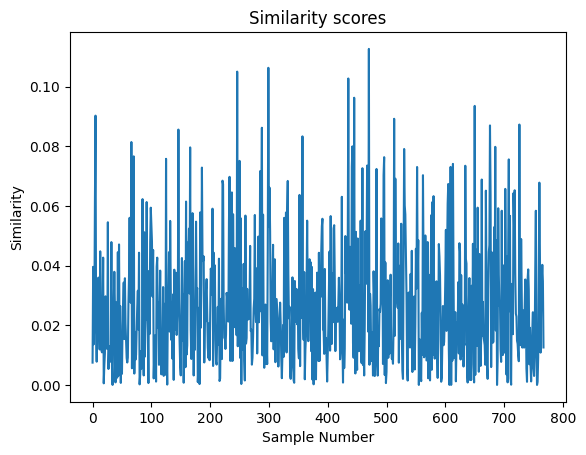

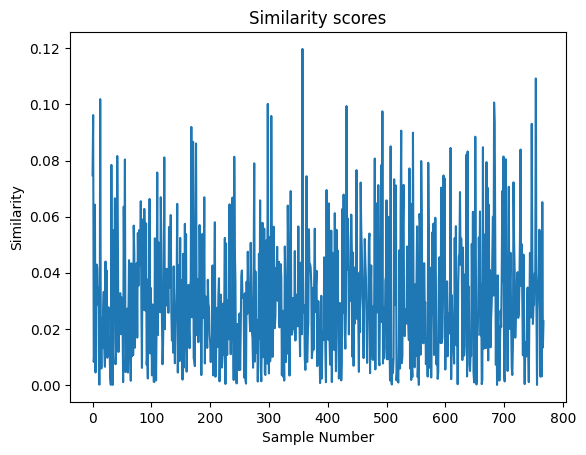

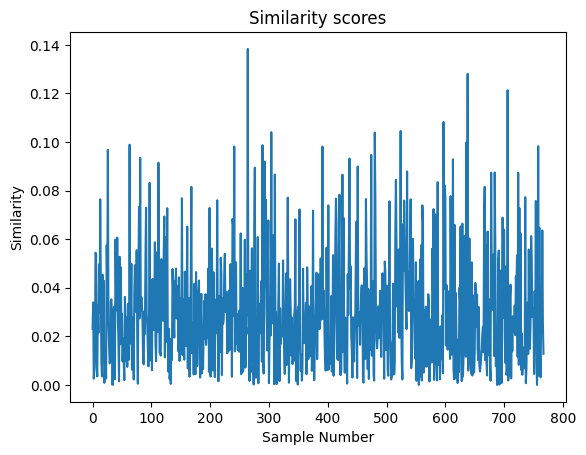

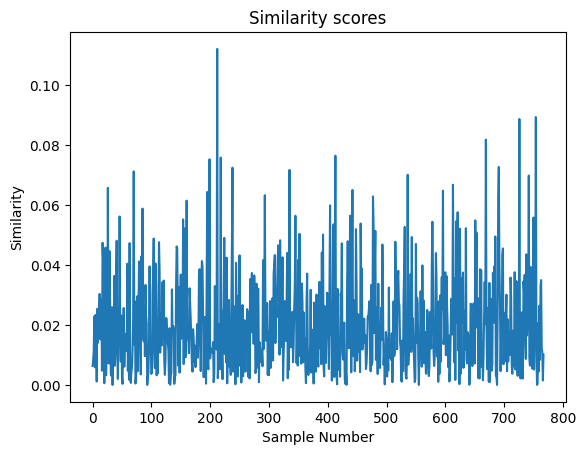

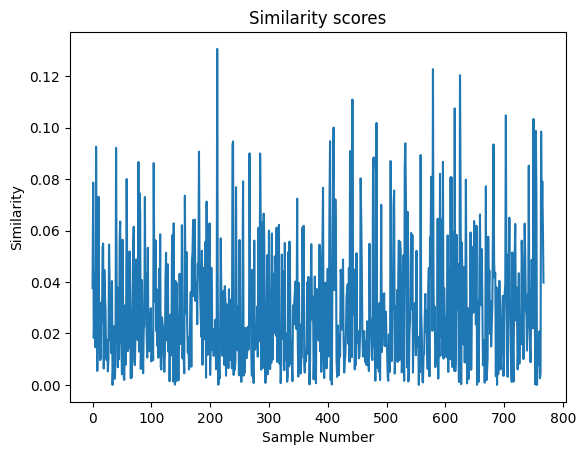

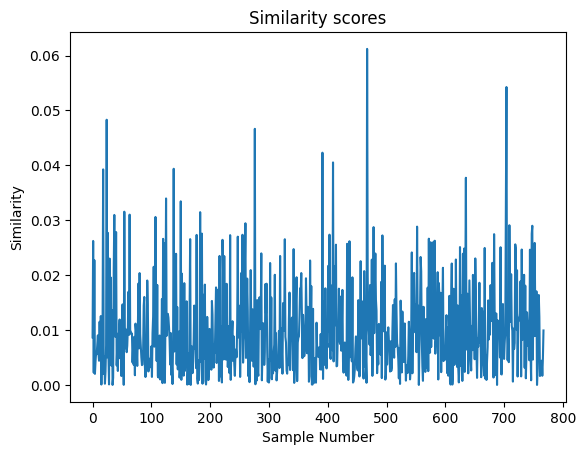

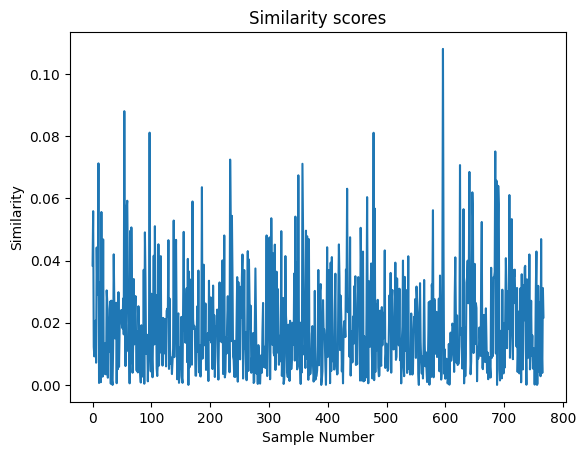

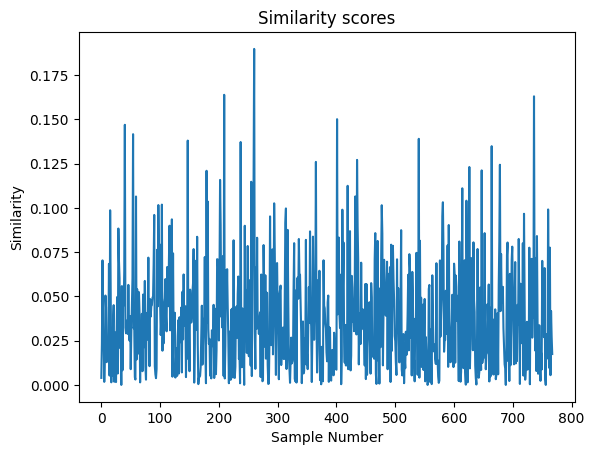

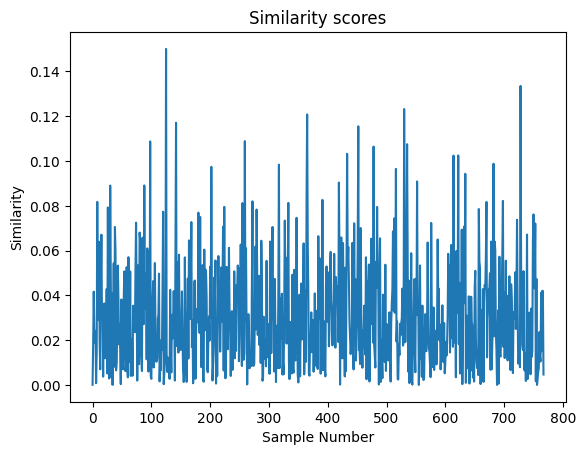

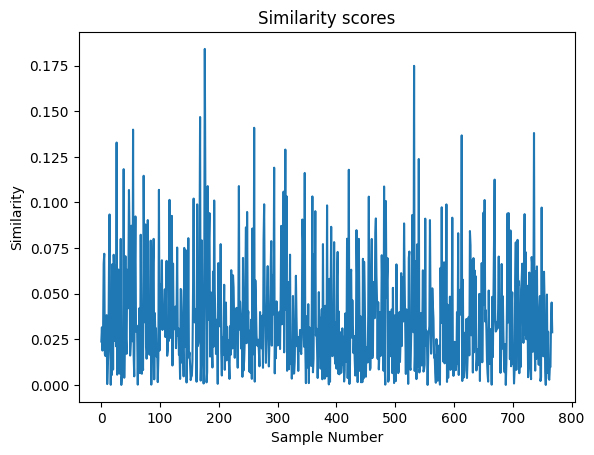

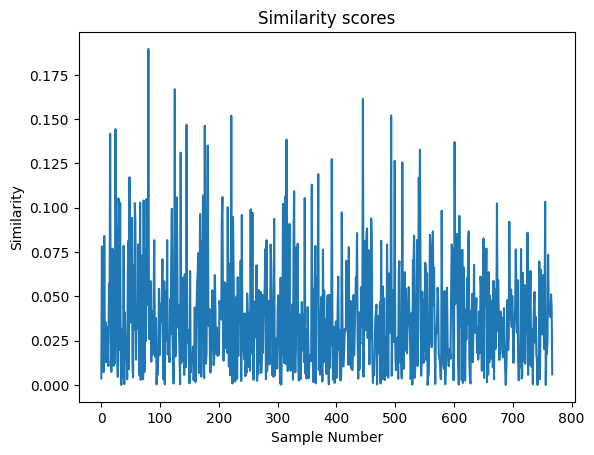

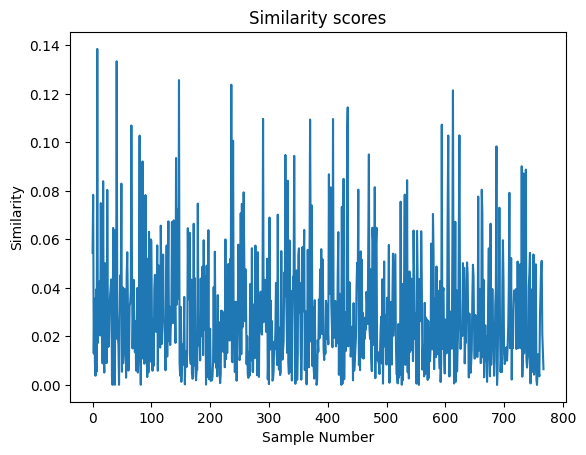

In [106]:
# print(comparisons[3])
# print(comparisons[4])

for i in range(1, len(arr)):
    val = np.abs(arr[i-1] - arr[i])
    val_sorted = np.sort(val)
    plot(val)

# val = np.abs(arr[6] - arr[7])
# val_sorted = np.sort(val)
# plot(val_sorted)

In [10]:
def writeScores(arr):
    print(f"Polite: {arr[0]}, Authoritative: {arr[1]}, Request: {arr[2]}")

print("Politeness Similarity:")
writeScores(comparisons[0])
print("\nAuthoritative Similarity:")
writeScores(comparisons[1])
print("\nRequest Similarity:")
writeScores(comparisons[2])

Politeness Similarity:
Polite: 0.9999999403953552, Authoritative: 0.7438795566558838, Request: 0.6722129583358765

Authoritative Similarity:
Polite: 0.7438795566558838, Authoritative: 0.9999999403953552, Request: 0.6223768591880798

Request Similarity:
Polite: 0.6722129583358765, Authoritative: 0.6223768591880798, Request: 1.000000238418579
